# Importing Libraries

In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [ ]:
data = pd.read_csv("beverage_sales.csv", encoding="latin1")

In [15]:

# Display the first few rows
print(data.head())


   Temperature (°C)  Promotion  Beverage Sales
0                33          1      184.462555
1                19          1      123.129571
2                12          1       70.459383
3                25          1      135.463954
4                23          1      124.307494


### Summary Statistics

In [17]:
# Data summary
print(data.info())

# Basic statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature (°C)  1000 non-null   int64  
 1   Promotion         1000 non-null   int64  
 2   Beverage Sales    1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB
None
       Temperature (°C)    Promotion  Beverage Sales
count       1000.000000  1000.000000     1000.000000
mean          21.370000     0.702000      121.052816
std            9.820873     0.457608       50.674022
min            5.000000     0.000000        7.997951
25%           13.000000     0.000000       78.832509
50%           22.000000     1.000000      121.609387
75%           30.000000     1.000000      161.906720
max           37.000000     1.000000      228.637179


# Data cleaning

In [19]:
# Check for missing values
print(data.isnull().sum())

Temperature (°C)    0
Promotion           0
Beverage Sales      0
dtype: int64


# EDA (Explore Data Analysis)

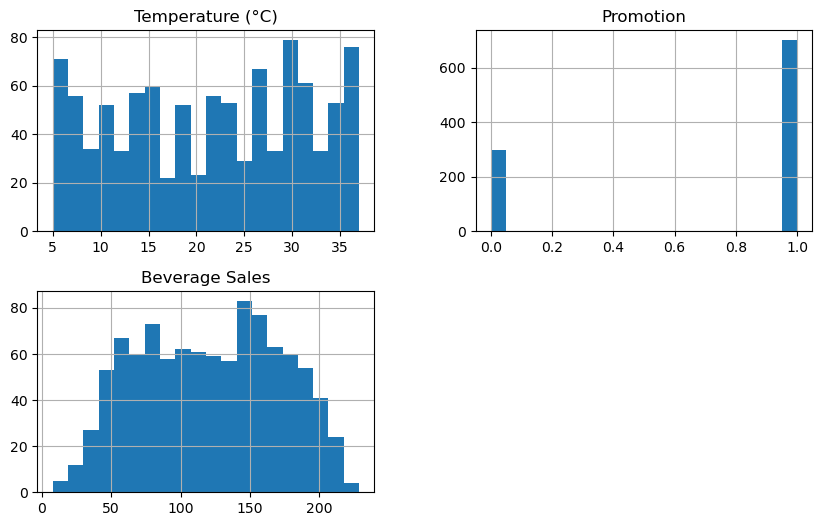

In [21]:
# Visualize distribution of numerical columns
#Multivalue analysis
data.hist(bins=20, figsize=(10, 6))
plt.show()

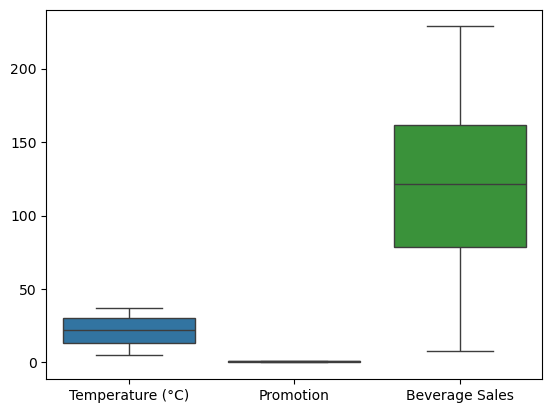

In [55]:
# Boxplot for detecting outliers
#Multivalue analysis
sns.boxplot(data=data)
plt.show()

### Relationships Between Variables

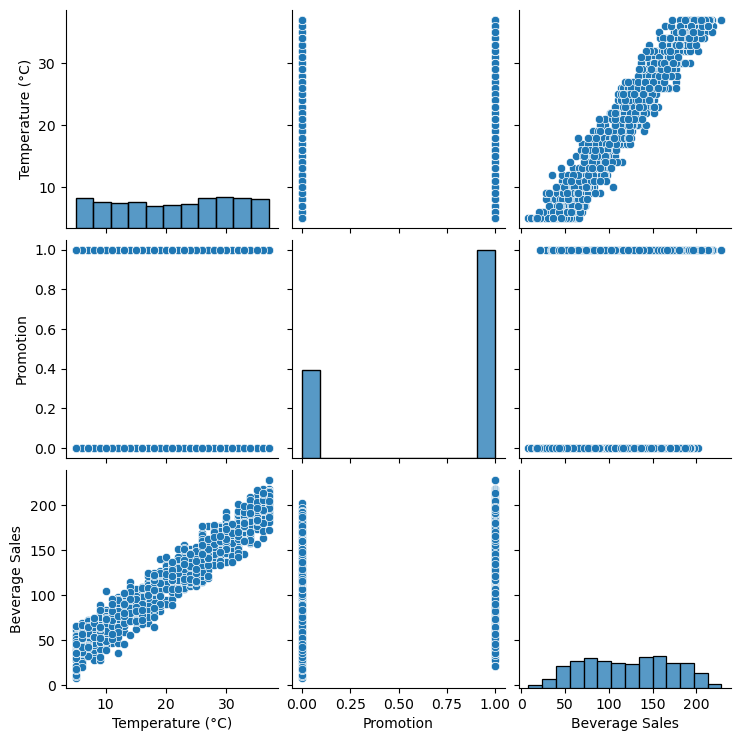

In [25]:
#Multivalue analysis
sns.pairplot(data)
plt.show()

### Relationships Between Variables

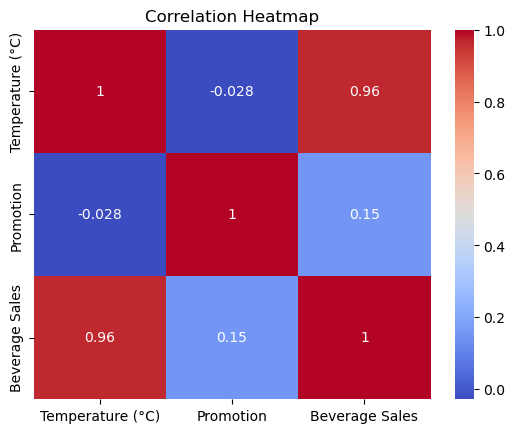

In [27]:
#Multivalue analysis
#Heatmap diagram
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

           Temperature (°C)  Beverage Sales
Promotion                                  
0                 21.791946      109.139973
1                 21.190883      126.109835


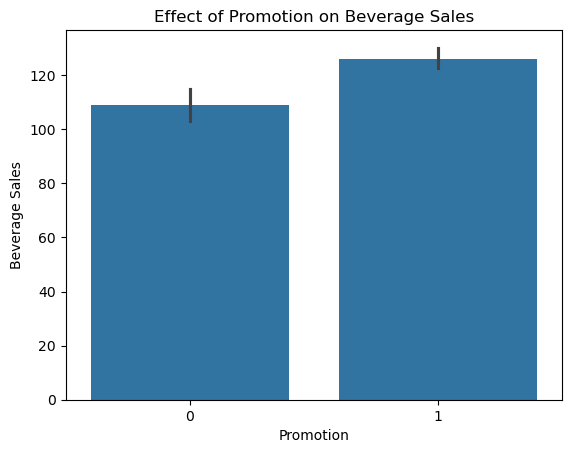

In [29]:
# Group by 'Promotion' to see its effect
grouped = data.groupby('Promotion').mean()
print(grouped)

# Visualize grouped data
sns.barplot(x='Promotion', y='Beverage Sales', data=data)
plt.title("Effect of Promotion on Beverage Sales")
plt.show()

# Importing ML library

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Define Features and Target Variable

In [66]:
X = data[['Temperature (°C)', 'Promotion']]  # Features
y = data['Beverage Sales']  # Target

### Split the Data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Linear Regression Model

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 5.02480045 20.56455672]
Intercept: -0.9178045134076314


###  Make Predictions

In [77]:
y_pred = model.predict(X_test)
y_pred

array([205.56436886, 135.21716256,  59.84515581, 150.29156391,
        64.86995626, 180.44036661, 180.44036661, 200.53956841,
       169.92541078,  79.47900268, 195.51476796,  64.86995626,
       109.62780538,  49.79555491, 134.75180763,  79.94435761,
       180.44036661, 135.21716256,  94.55340403, 100.04355941,
       100.04355941, 179.97501168,  79.94435761,  64.86995626,
       120.14276121, 135.21716256, 200.53956841, 125.16756166,
       110.09316031, 150.29156391, 120.14276121, 104.60300493,
        59.37980089, 180.44036661, 149.82620898, 139.77660808,
        79.94435761, 134.75180763, 160.34116481, 139.77660808,
        64.86995626, 115.11796076, 165.36596526,  24.20619774,
       190.48996751, 100.04355941,  95.01875896,  64.86995626,
       125.16756166, 125.16756166,  64.86995626,  54.82035536,
        49.79555491, 160.34116481, 120.14276121,  59.84515581,
       190.48996751,  54.82035536, 205.56436886, 170.39076571,
       190.48996751, 110.09316031,  24.20619774,  49.79

### Evaluate the Model

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 82.88821731257089
R² Score: 0.9670697473880541


# Visualize Results

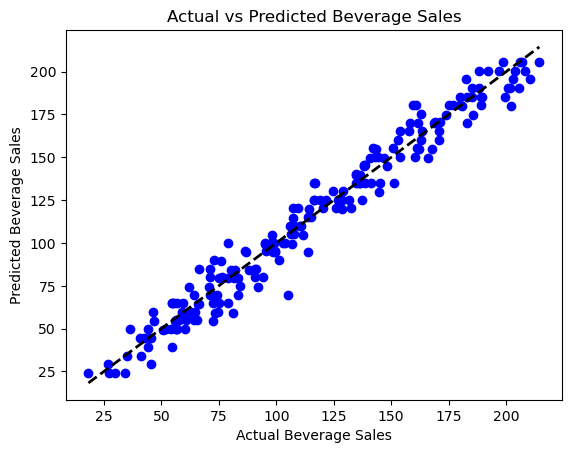

In [82]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Beverage Sales")
plt.ylabel("Predicted Beverage Sales")
plt.title("Actual vs Predicted Beverage Sales")
plt.show()